In [1]:
import numpy as np

np.show_config()

openblas64__info:
    library_dirs = ['D:\\a\\numpy\\numpy\\build\\openblas64__info']
    libraries = ['openblas64__info']
    language = f77
    define_macros = [('HAVE_CBLAS', None), ('BLAS_SYMBOL_SUFFIX', '64_'), ('HAVE_BLAS_ILP64', None)]
blas_ilp64_opt_info:
    library_dirs = ['D:\\a\\numpy\\numpy\\build\\openblas64__info']
    libraries = ['openblas64__info']
    language = f77
    define_macros = [('HAVE_CBLAS', None), ('BLAS_SYMBOL_SUFFIX', '64_'), ('HAVE_BLAS_ILP64', None)]
openblas64__lapack_info:
    library_dirs = ['D:\\a\\numpy\\numpy\\build\\openblas64__lapack_info']
    libraries = ['openblas64__lapack_info']
    language = f77
    define_macros = [('HAVE_CBLAS', None), ('BLAS_SYMBOL_SUFFIX', '64_'), ('HAVE_BLAS_ILP64', None), ('HAVE_LAPACKE', None)]
lapack_ilp64_opt_info:
    library_dirs = ['D:\\a\\numpy\\numpy\\build\\openblas64__lapack_info']
    libraries = ['openblas64__lapack_info']
    language = f77
    define_macros = [('HAVE_CBLAS', None), ('BLAS_SYMBOL_SUFFI

In [2]:
np.__version__

'1.23.5'

In [3]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [5]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + rng.normal(size=size) * sigma

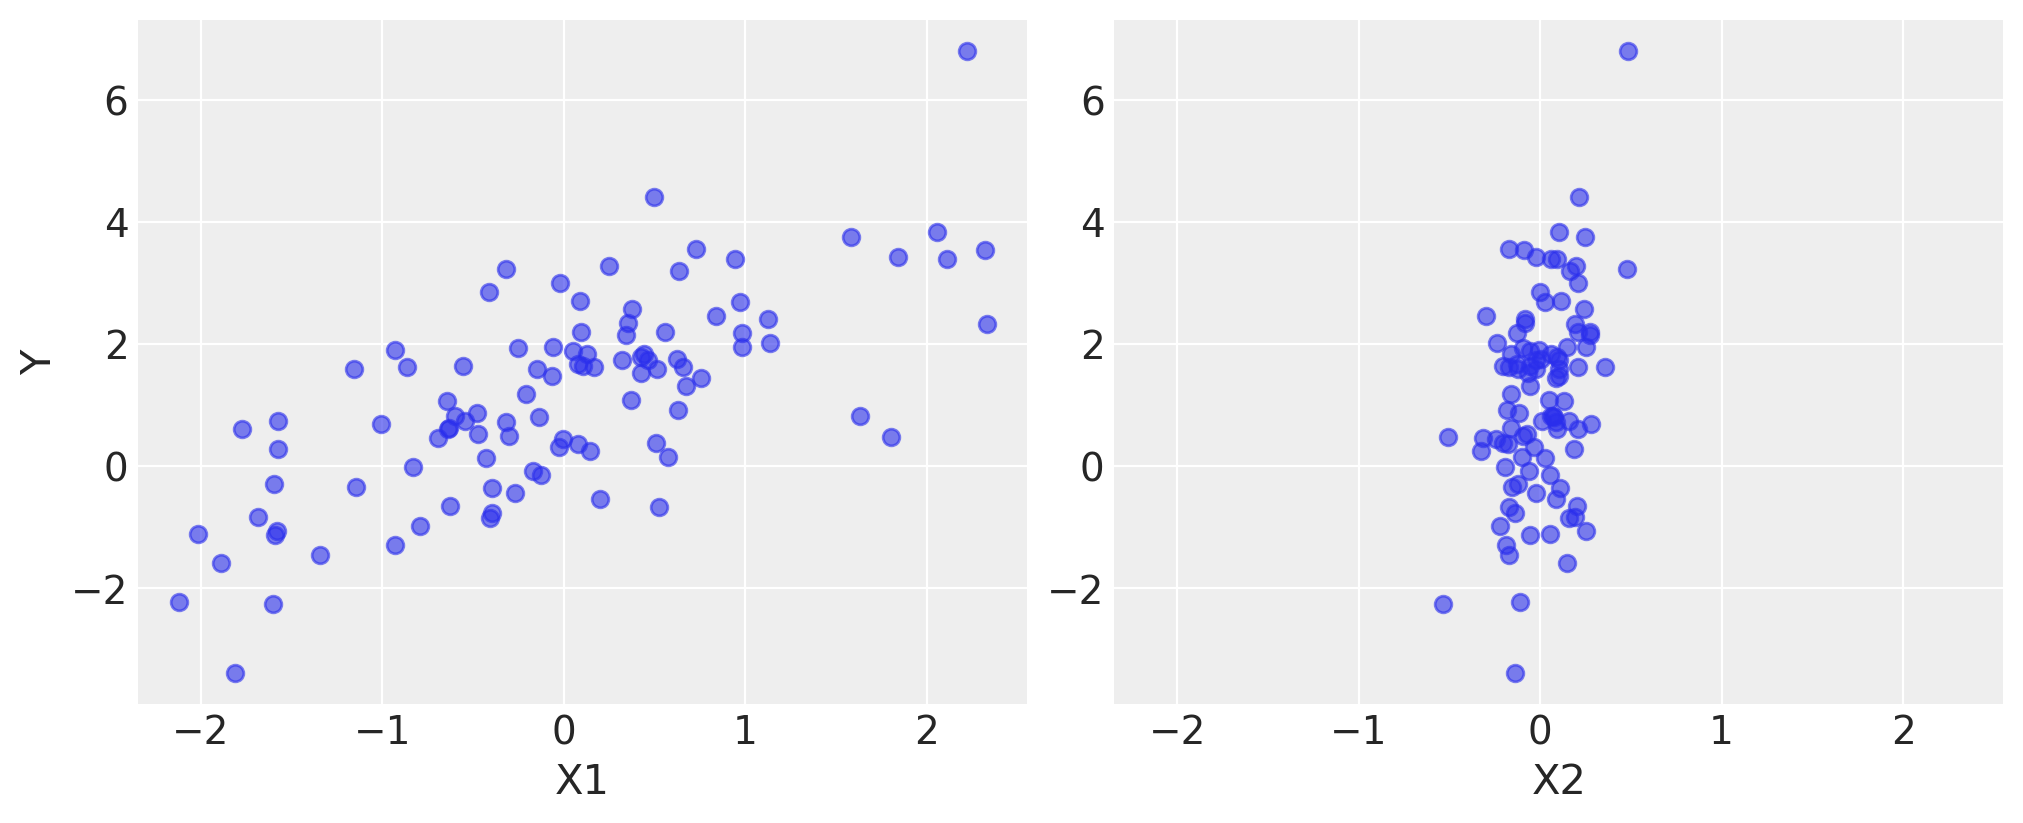

In [6]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");

In [7]:
import pymc as pm

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.9.2


In [15]:
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = pm.Deterministic("mu", alpha + beta[0] * X1 + beta[1] * X2)

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [18]:
with basic_model:
    # draw 1000 posterior samples
    idata = pm.sample(nuts_sampler="numpyro", cores=4, chains=4)

Compiling...
Compilation time = 0:00:01.334442
Sampling...
Compiling.. :   0%|          | 0/2000 [00:00<?, ?it/s]








Running chain 3: 100%|██████████| 2000/2000 [00:03<00:00, 631.88it/s]
Sampling time = 0:00:03.372303
Transforming variables...
Transformation time = 0:00:00.178139


In [10]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [11]:
idata.posterior["alpha"].sel(draw=slice(0, 4))

<xarray.DataArray 'alpha' (chain: 4, draw: 5)>
array([[1.2099848 , 1.05912822, 1.25439442, 1.24058357, 1.40288378],
       [1.09434889, 1.18346045, 1.09651282, 0.97205411, 1.3785465 ],
       [1.23141901, 1.086182  , 1.19148631, 1.09584764, 1.18893059],
       [1.29101351, 1.35759499, 1.16768804, 1.18367356, 1.1439971 ]])
Coordinates:
  * chain    (chain) int32 0 1 2 3
  * draw     (draw) int32 0 1 2 3 4

In [12]:
with basic_model:
    # instantiate sampler
    step = pm.Slice()

    # draw 5000 posterior samples
    slice_idata = pm.sample(5000, step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [alpha]
>Slice: [beta]
>Slice: [sigma]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 42 seconds.


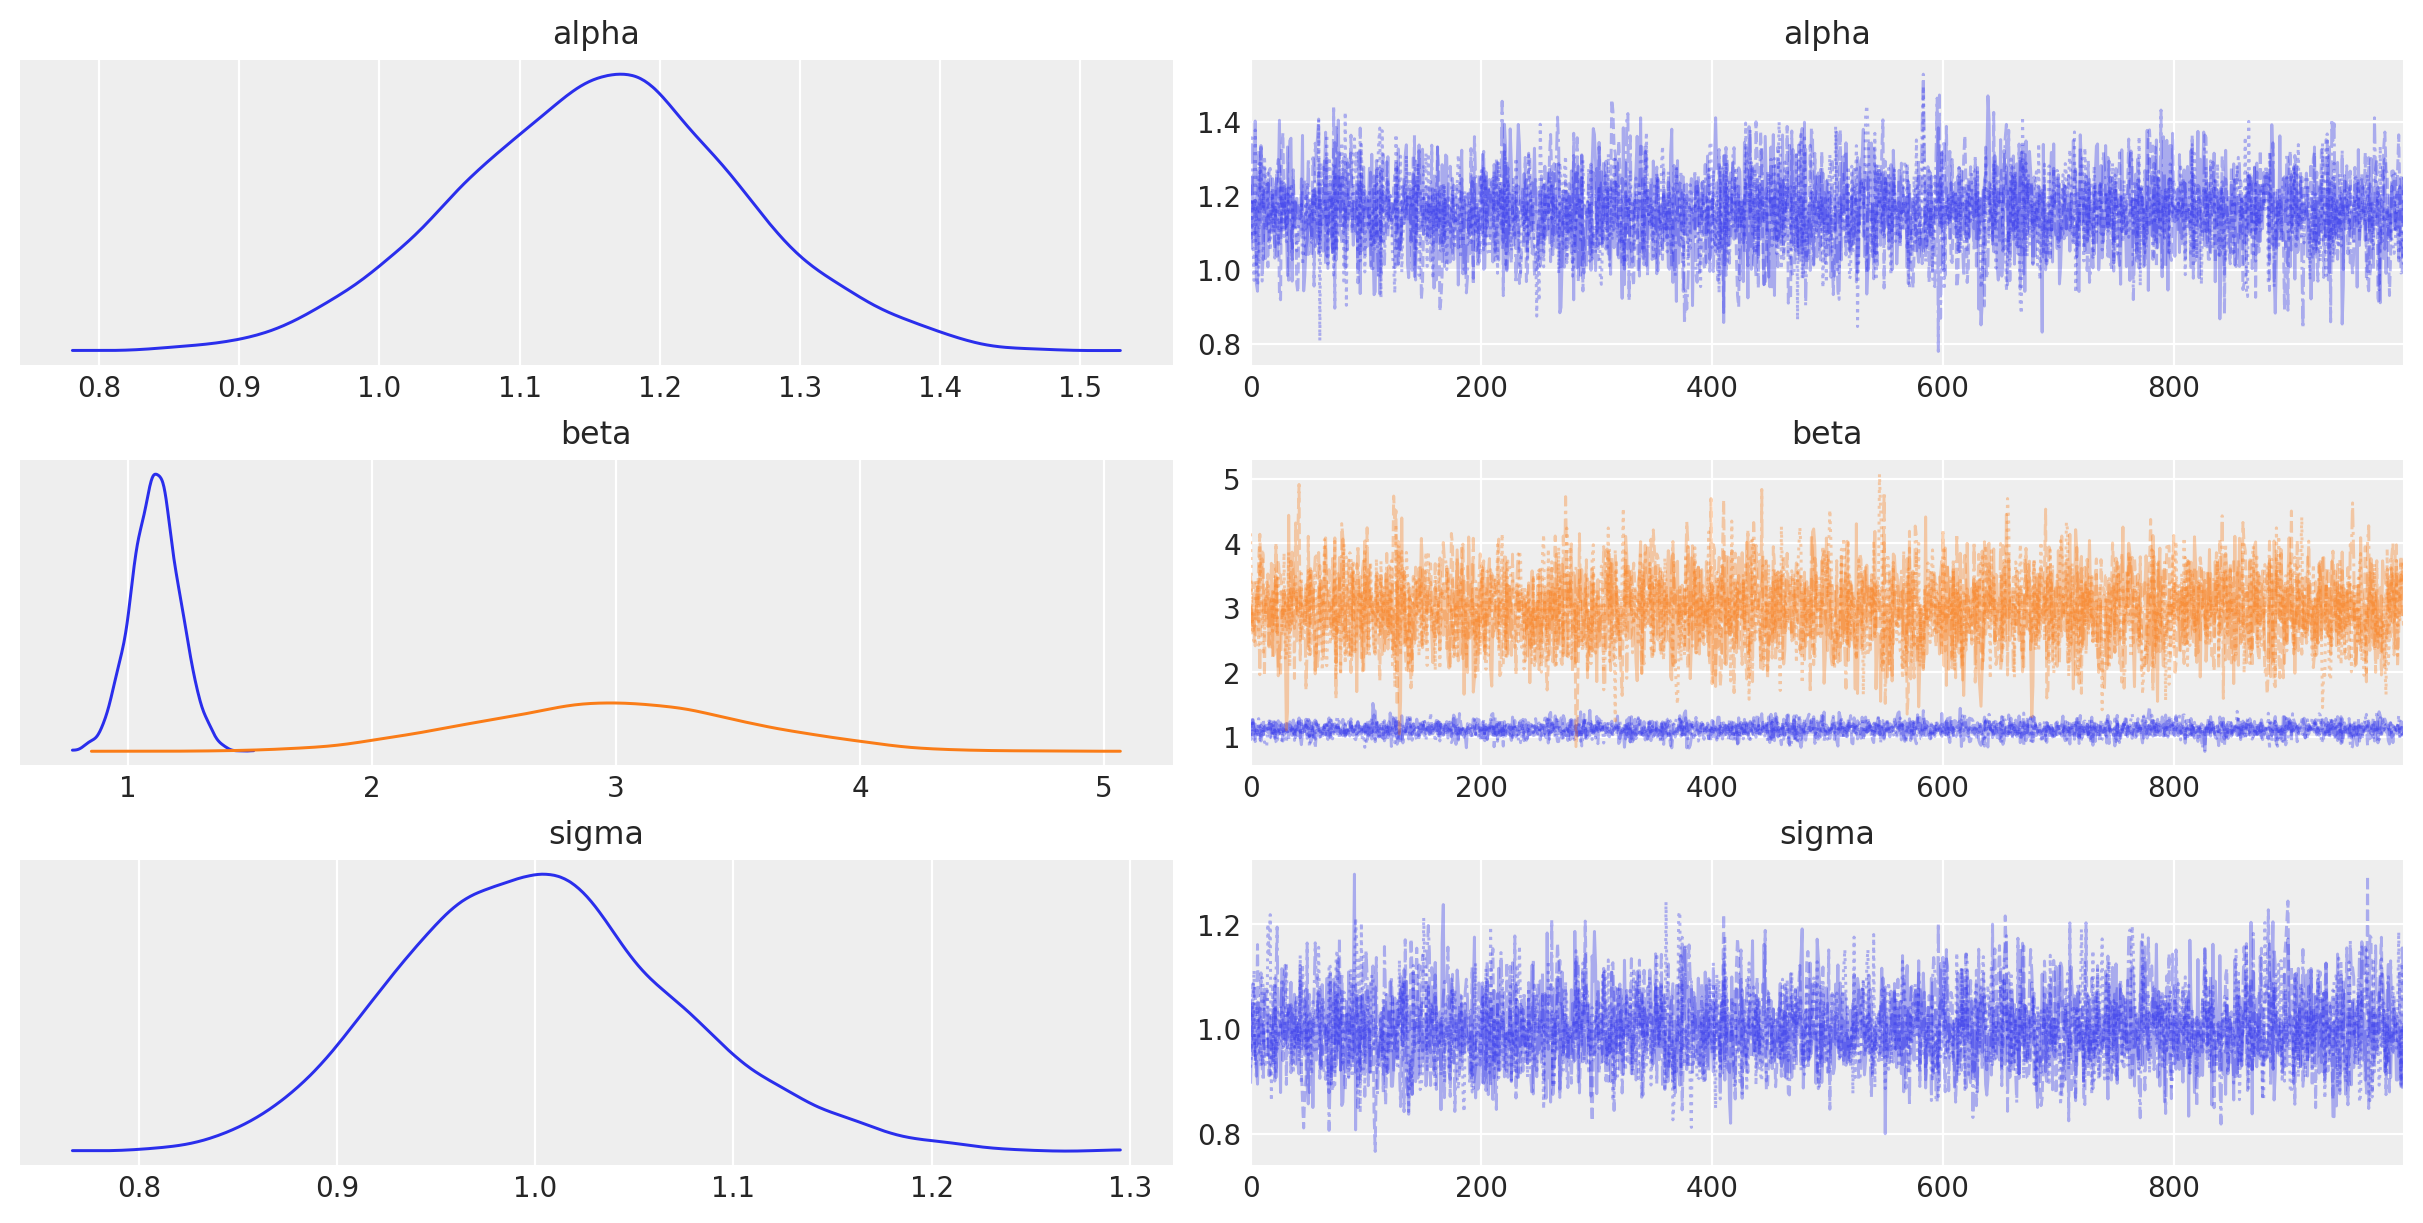

In [13]:
az.plot_trace(idata, combined=True);

In [14]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.16,0.10,0.96,1.34,0.00,0.00,4590.30,2557.32,1.0
beta[0],1.11,0.10,0.92,1.30,0.00,0.00,3922.13,2847.31,1.0
beta[1],2.98,0.55,2.00,4.04,0.01,0.01,3848.15,3104.79,1.0
sigma,1.00,0.07,0.87,1.14,0.00,0.00,3851.63,3244.92,1.0
